<h3>Project Name:<i><b> "Modern heart disease prediction by the help of AI" </b></i><br></h3>
<p>Dataset Source: <a href="https://www.openml.org/search?type=data&status=active&id=43682&sort=runs" target="_blank">Heart-Disease-Dataset-(Comprehensive)</a></p>

---
---

<b> CSE-422 Lab Project | Group-2 | Section-9 |</b>

<b>Name: Arif Hassan<br>
ID: Null</b>

<b>Name: Faishal Monir<br>
ID: Null
</b>




###**Data Preprocessing !!**

In [ ]:
#Import Libraries Tab
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy



In [ ]:
from google.colab import drive
drive.mount('/content/Gdrive')

Mounted at /content/Gdrive


In [ ]:
dataset = pd.read_csv("/content/Gdrive/MyDrive/CSE422/Final_project/Heart_data.csv")
originaldata=pd.read_csv("/content/Gdrive/MyDrive/CSE422/Final_project/Heart_data.csv")
dataset.head(3)

,Age,Sex,Chest_pain_type,Resting_bp_s,Cholesterol,Fasting_blood_sugar,Resting_ecg,Max_heart_rate,Exercise_Angina,Oldpeak,ST_slope,Target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0


In [ ]:
dataset.isnull().sum()

,0
Age,0
Sex,0
Chest_pain_type,0
Resting_bp_s,0
Cholesterol,0
Fasting_blood_sugar,0
Resting_ecg,0
Max_heart_rate,0
Exercise_Angina,0
Oldpeak,0


In [ ]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1190 non-null   int64  
 1   Sex                  1190 non-null   int64  
 2   Chest_pain_type      1190 non-null   int64  
 3   Resting_bp_s         1190 non-null   int64  
 4   Cholesterol          1190 non-null   int64  
 5   Fasting_blood_sugar  1190 non-null   int64  
 6   Resting_ecg          1190 non-null   int64  
 7   Max_heart_rate       1190 non-null   int64  
 8   Exercise_Angina      1190 non-null   int64  
 9   Oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  Target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


(1190, 12)

In [ ]:
# dataset= dataset.drop(['Oldpeak', 'ST_slope'], axis = 1)
# dataset.shape

In [ ]:
print(dataset.dtypes)

Age                      int64
Sex                      int64
Chest_pain_type          int64
Resting_bp_s             int64
Cholesterol              int64
Fasting_blood_sugar      int64
Resting_ecg              int64
Max_heart_rate           int64
Exercise_Angina          int64
Oldpeak                float64
ST_slope                 int64
Target                   int64
dtype: object


In [ ]:
print("Number of unique values in each column:\n", dataset.nunique())
print("================================================================")
for column in dataset.columns:
    print(f"\nUnique values in column '{column}':")
    print(dataset[column].unique())

Number of unique values in each column:
 Age                     50
Sex                      2
Chest_pain_type          4
Resting_bp_s            67
Cholesterol            222
Fasting_blood_sugar      2
Resting_ecg              3
Max_heart_rate         119
Exercise_Angina          2
Oldpeak                 53
ST_slope                 4
Target                   2
dtype: int64

Unique values in column 'Age':
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]

Unique values in column 'Sex':
[1 0]

Unique values in column 'Chest_pain_type':
[2 3 4 1]

Unique values in column 'Resting_bp_s':
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]

Unique values in column 'Chol

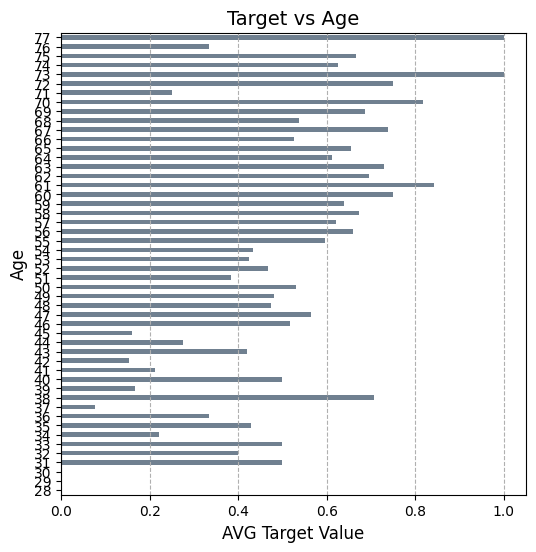

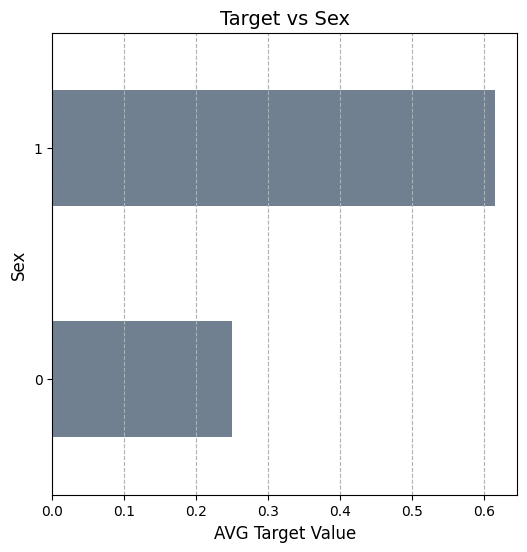

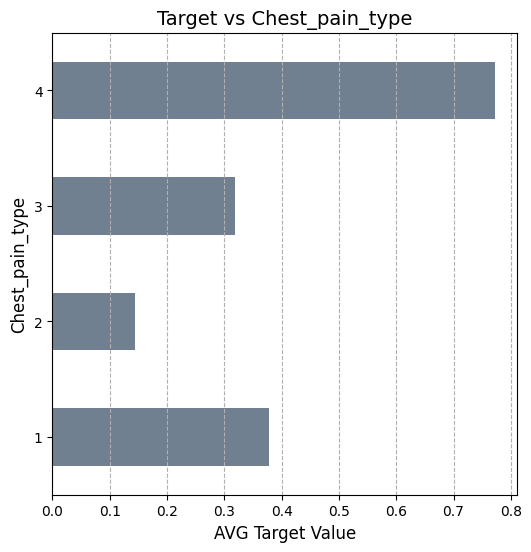

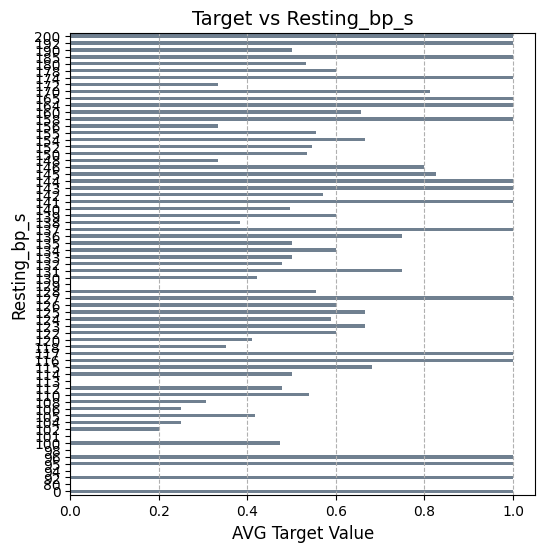

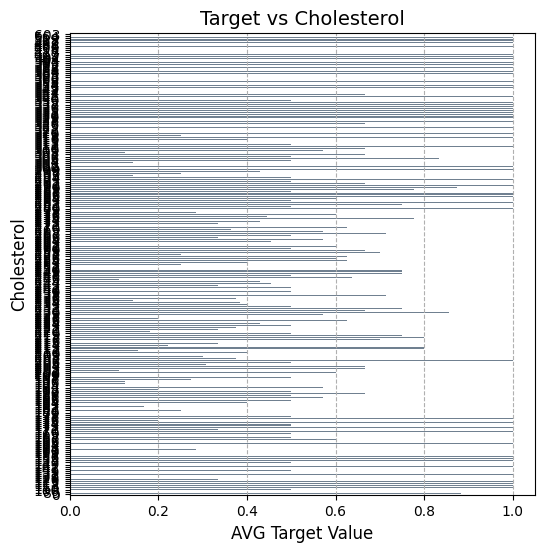

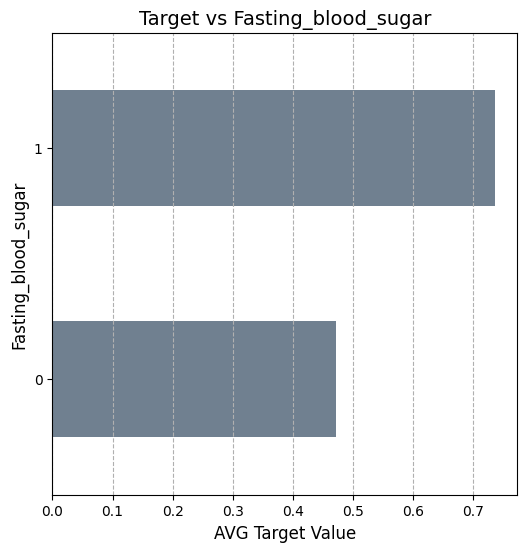

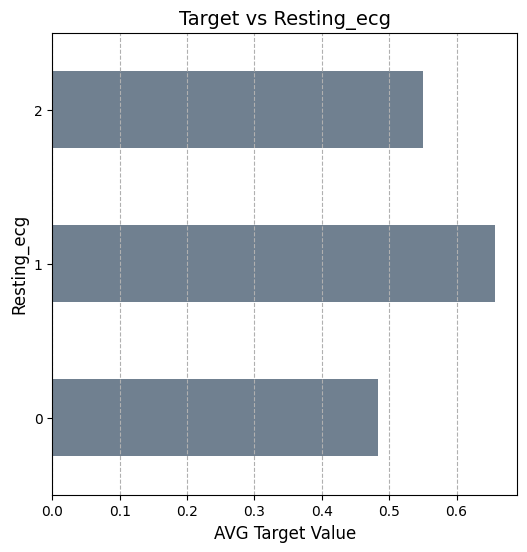

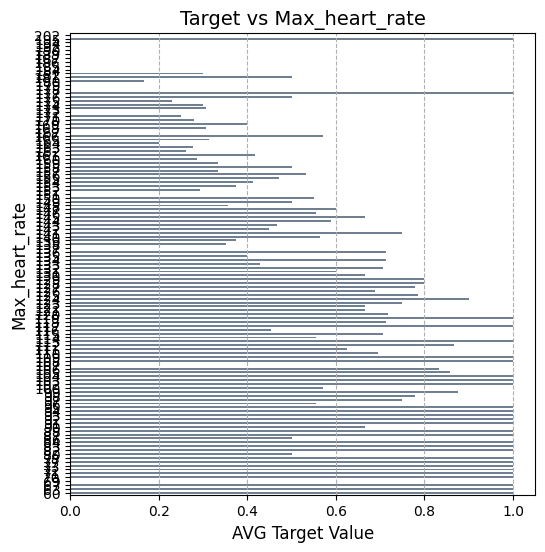

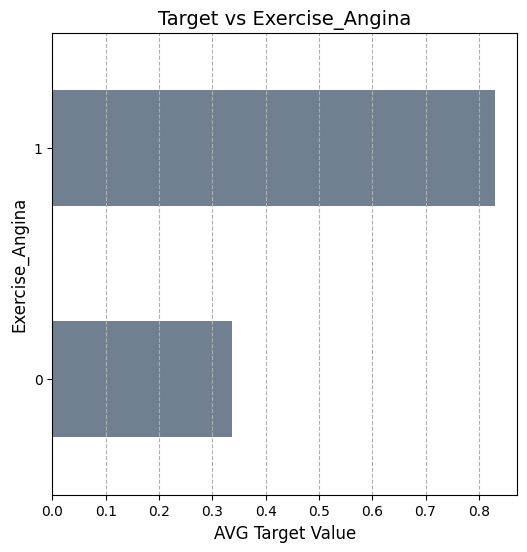

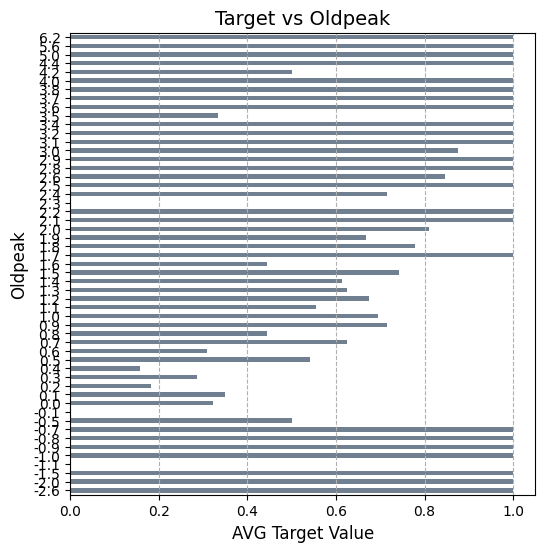

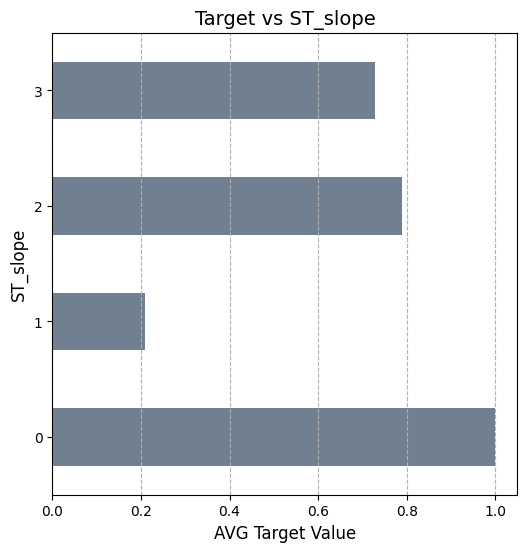

In [ ]:
columns_to_plot = dataset.columns[:-1]

for column in columns_to_plot:
    plt.figure(figsize=(6,6))
    grouped_data = dataset.groupby(column)['Target'].mean()
    grouped_data.plot(kind='barh', color='slategrey')
    plt.title(f'Target vs {column}', fontsize=14)
    plt.xlabel('AVG Target Value', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.grid(axis='x', linestyle='--')
    plt.show()

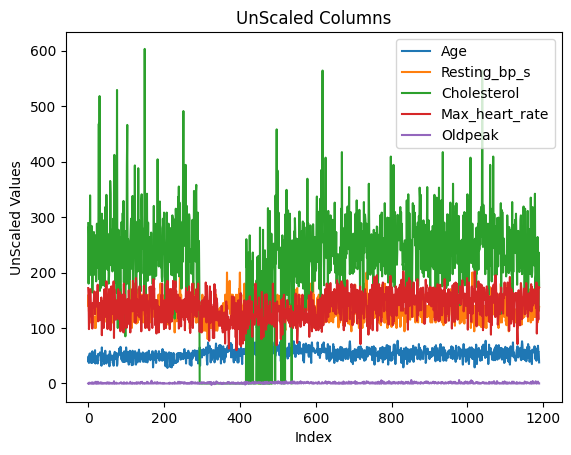

In [ ]:
scaling= ['Age', 'Resting_bp_s', 'Cholesterol', 'Max_heart_rate','Oldpeak']
for column in scaling:
    plt.plot(dataset.index, dataset[column], label=column)

plt.title('UnScaled Columns')
plt.xlabel('Index')
plt.ylabel('UnScaled Values')
plt.legend()
plt.show()

In [ ]:
x= dataset.iloc[:, :-1]
y= dataset.iloc[:, -1]
print("X shape: ",x.shape)
print("Y shape: ",y.shape)
x.head(3)

X shape:  (1190, 11)
Y shape:  (1190,)


,Age,Sex,Chest_pain_type,Resting_bp_s,Cholesterol,Fasting_blood_sugar,Resting_ecg,Max_heart_rate,Exercise_Angina,Oldpeak,ST_slope
0,40,1,2,140,289,0,0,172,0,0.0,1
1,49,0,3,160,180,0,0,156,0,1.0,2
2,37,1,2,130,283,0,1,98,0,0.0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=100)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

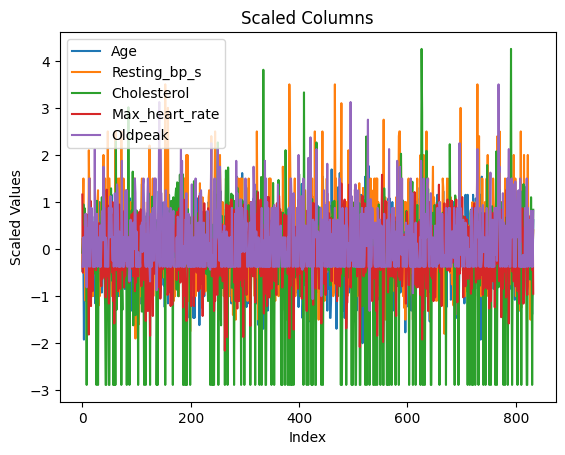

In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=x.columns)

for column in scaling:
    plt.plot(X_train_scaled_df.index, X_train_scaled_df[column], label=column)

plt.title('Scaled Columns')
plt.xlabel('Index')
plt.ylabel('Scaled Values')
plt.legend()
plt.show()

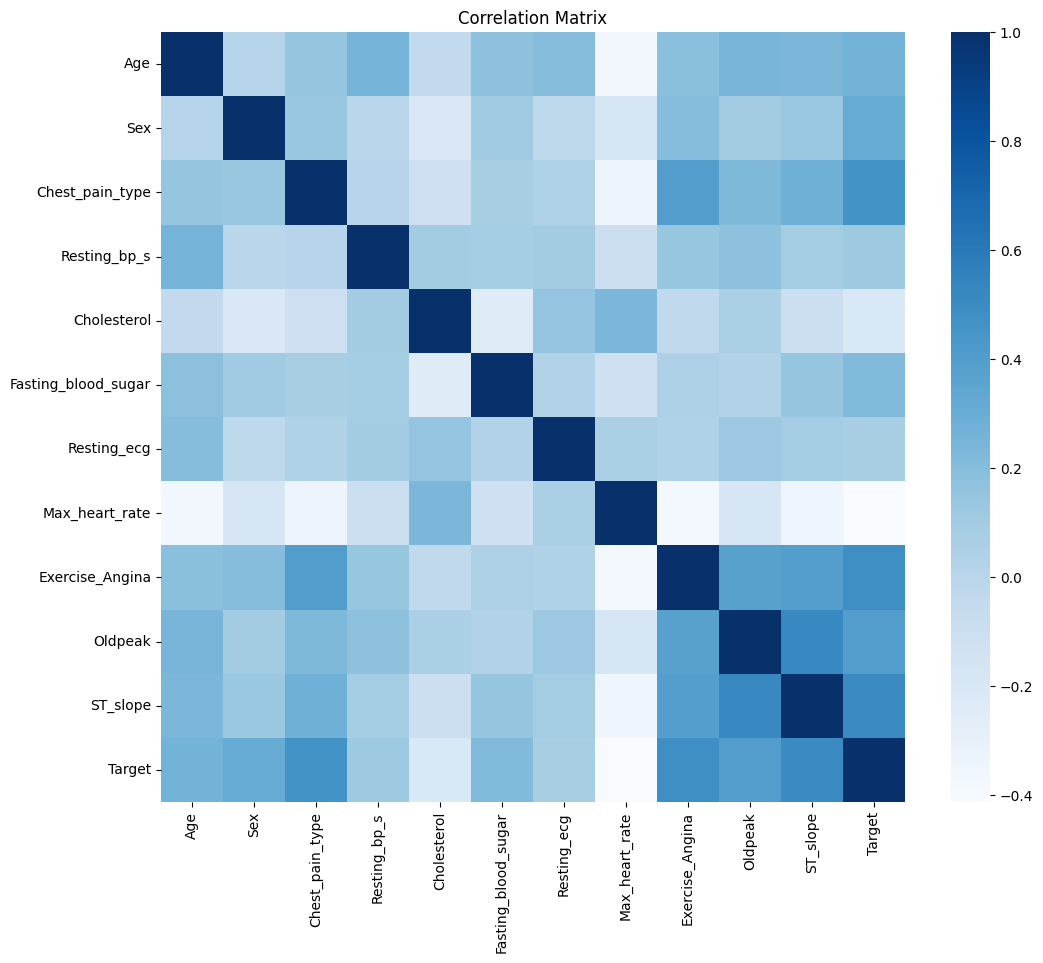

In [ ]:
corelation=dataset.corr()
corelation
plt.figure(figsize=(12, 10))
sns.heatmap(corelation, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

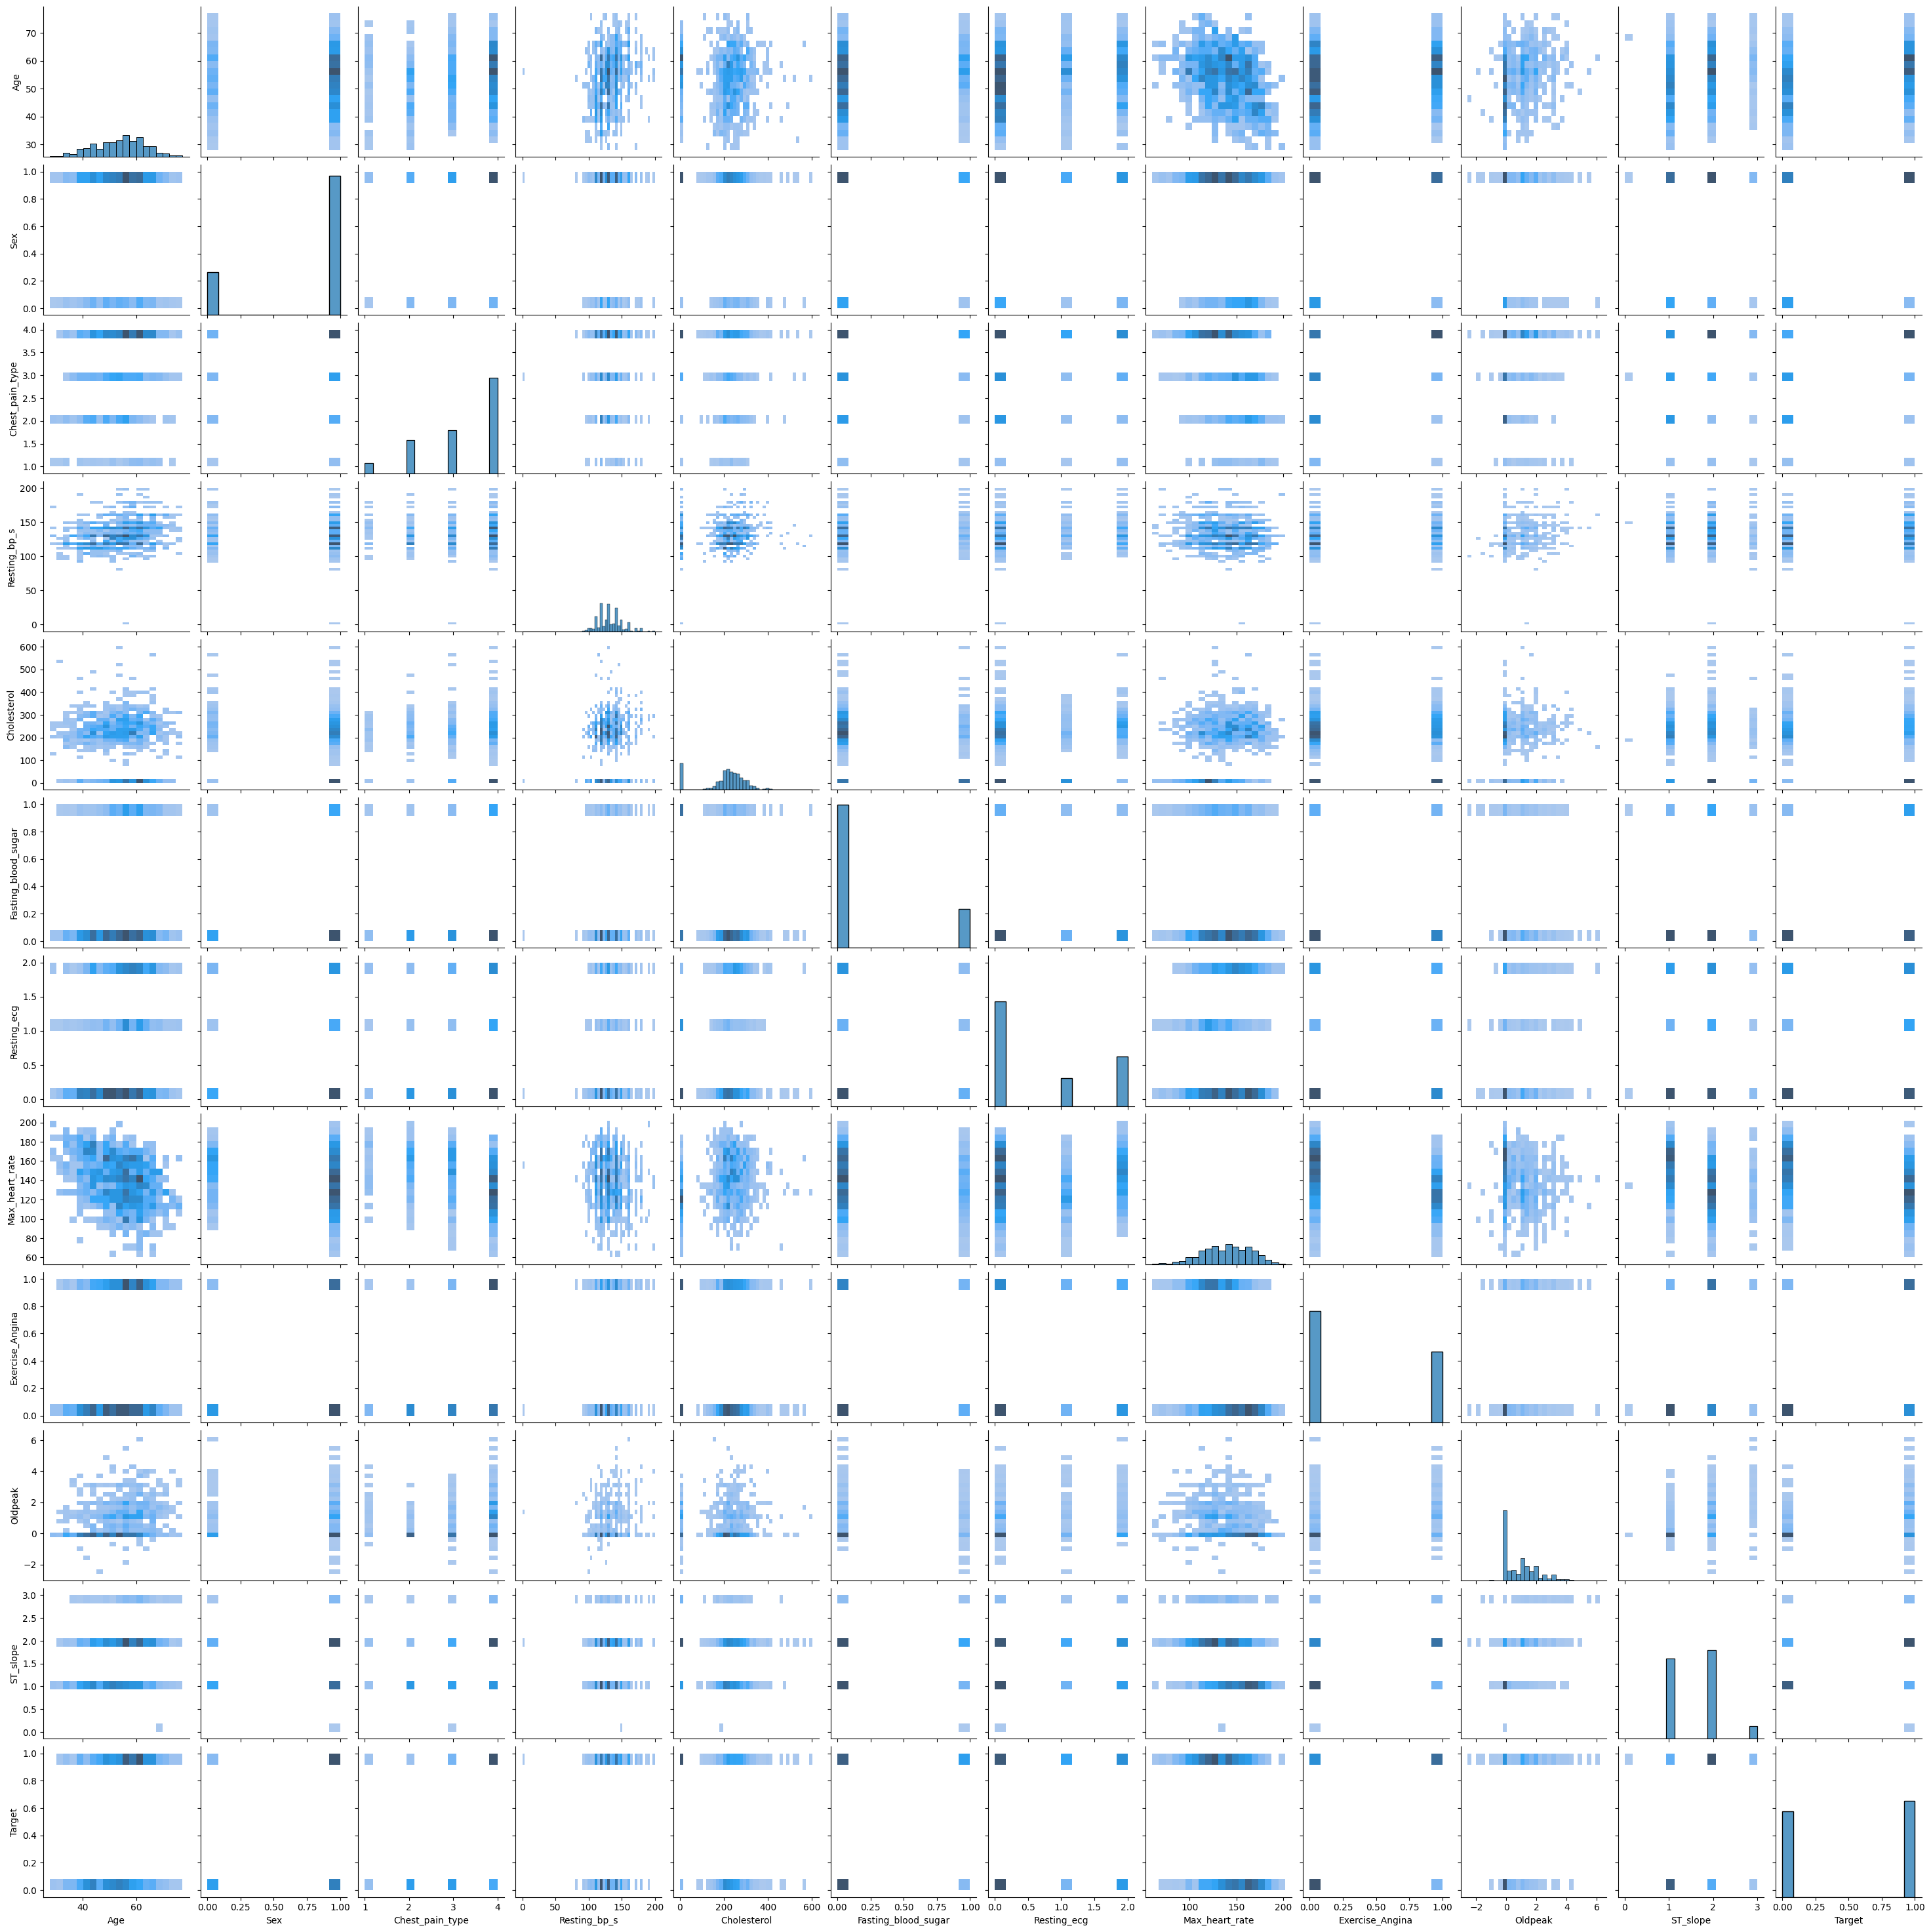

In [ ]:
sns.pairplot(dataset,kind="hist")
plt.show()


In [ ]:
correlation = dataset.corr()
target_correlation = correlation["Target"].drop("Target")
sorted_correlation = target_correlation.sort_values(ascending=False)
print("Correlation of features with Target:\n")
print(sorted_correlation)

Correlation of features with Target:

ST_slope               0.505608
Exercise_Angina        0.481467
Chest_pain_type        0.460127
Oldpeak                0.398385
Sex                    0.311267
Age                    0.262029
Fasting_blood_sugar    0.216695
Resting_bp_s           0.121415
Resting_ecg            0.073059
Cholesterol           -0.198366
Max_heart_rate        -0.413278
Name: Target, dtype: float64


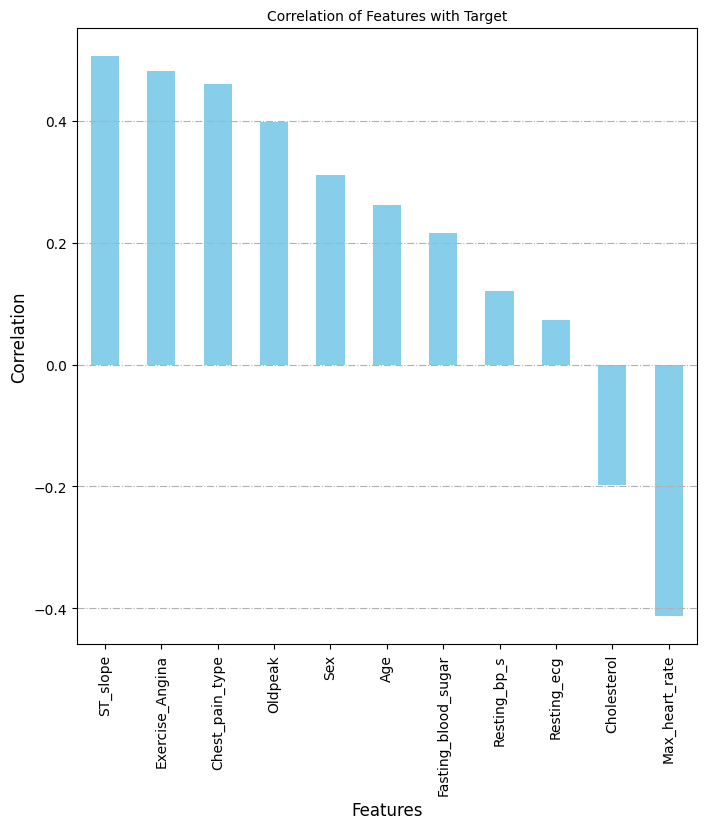

In [ ]:
plt.figure(figsize=(8, 8))
sorted_correlation.plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target", fontsize=10)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Correlation", fontsize=12)
plt.grid(axis='y', linestyle='dashdot')
plt.show()

<hr>
<hr>

#**<li>Logistic Regression**

In [ ]:
# Logistic Regression
log_reg_model = LogisticRegression(max_iter=10000, random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_preds = log_reg_model.predict(X_test_scaled)
# Metrics
accuracy_log_reg = accuracy_score(y_test, log_reg_preds)*100
log_reg_report = classification_report(y_test, log_reg_preds)
print(f"Logistic Regression Classification Report:\n{log_reg_report}")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       168
           1       0.84      0.79      0.82       189

    accuracy                           0.81       357
   macro avg       0.81      0.81      0.81       357
weighted avg       0.81      0.81      0.81       357



Confusion Matrix:
 [[140  28]
 [ 39 150]]


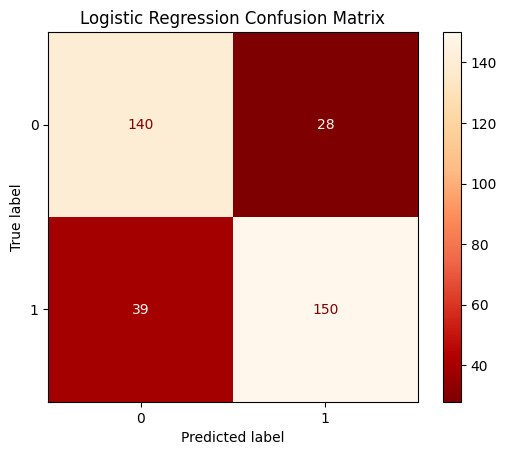

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, log_reg_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])

# Display Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)
disp.plot(cmap = "OrRd_r")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

<hr>
<hr>

#**<li>Decision Tree**

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_preds = rf_model.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, rf_preds)*100
rf_report = classification_report(y_test, rf_preds)
print(f"Random Forest Classification Report:\n{rf_report}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       168
           1       0.91      0.95      0.93       189

    accuracy                           0.92       357
   macro avg       0.93      0.92      0.92       357
weighted avg       0.93      0.92      0.92       357



Confusion Matrix:
 [[150  18]
 [  9 180]]


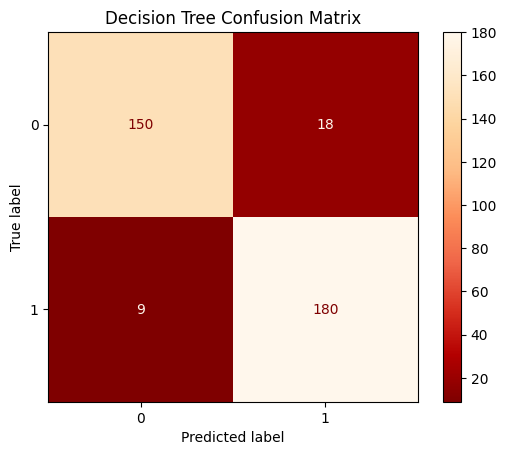

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
conf_matrix = confusion_matrix(y_test,rf_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])

# Display Confusion Matrix
print("Confusion Matrix:\n", conf_matrix)
disp.plot(cmap = "OrRd_r")
plt.title("Decision Tree Confusion Matrix")
plt.show()


<hr>
<hr>

#**<li>Neural Networks**

In [ ]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((833, 11), (357, 11), (833,), (357,))

In [ ]:

model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, epochs = 500, batch_size=128)

Epoch 1/500
7/7 [==============================] - 2s 29ms/step - loss: 0.6870 - accuracy: 0.4946
Epoch 2/500
7/7 [==============================] - 0s 31ms/step - loss: 0.6690 - accuracy: 0.6303
Epoch 3/500
7/7 [==============================] - 0s 33ms/step - loss: 0.6482 - accuracy: 0.7467
Epoch 4/500
7/7 [==============================] - 0s 20ms/step - loss: 0.6241 - accuracy: 0.7899
Epoch 5/500
7/7 [==============================] - 0s 20ms/step - loss: 0.5962 - accuracy: 0.8127
Epoch 6/500
7/7 [==============================] - 0s 34ms/step - loss: 0.5669 - accuracy: 0.8283
Epoch 7/500
7/7 [==============================] - 0s 32ms/step - loss: 0.5407 - accuracy: 0.8379
Epoch 8/500
7/7 [==============================] - 0s 32ms/step - loss: 0.5151 - accuracy: 0.8511
Epoch 9/500
7/7 [==============================] - 0s 31ms/step - loss: 0.4814 - accuracy: 0.8523
Epoch 10/500
7/7 [==============================] - 0s 32ms/step - loss: 0.4417 - accuracy: 0.8583
Epoch 11/500
7/7 [=

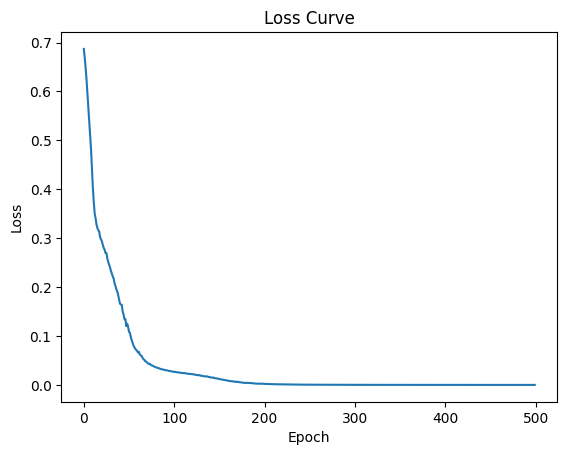

12/12 [==============================] - 0s 2ms/step - loss: 1.2100 - accuracy: 0.9048
Testing Accuracy: 90.48%


In [ ]:
plt.plot(history.history['loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()
accuracy=round(model.evaluate(X_test_scaled, y_test)[1] * 100, 2)
print(f"Testing Accuracy: {accuracy}%")
neural_testing_accuracy=accuracy

12/12 [==============================] - 0s 2ms/step
Testing Accuracy: 0.9047619047619048
Confusion Matrix:
 [[149  19]
 [ 15 174]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       168
           1       0.90      0.92      0.91       189

    accuracy                           0.90       357
   macro avg       0.91      0.90      0.90       357
weighted avg       0.90      0.90      0.90       357



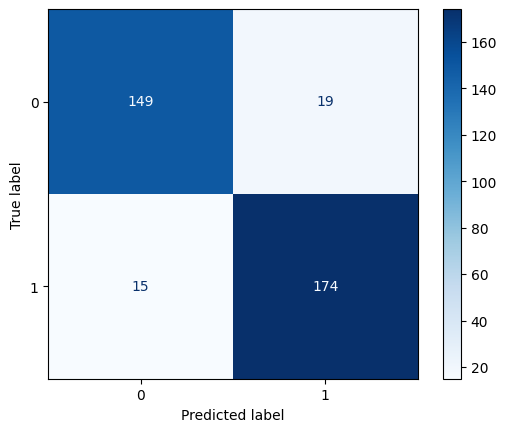

In [ ]:
y_pred= model.predict(X_test_scaled)
y_pred_round = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_round)
conf_matrix = confusion_matrix(y_test, y_pred_round)
report = classification_report(y_test, y_pred_round)

print("Testing Accuracy:", accuracy)
print("==============================")
print("Confusion Matrix:\n", conf_matrix)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0, 1])
disp.plot(cmap="Blues")
print("==============================")
print("Classification Report:\n", report)


<hr>
<hr>

#**<li>Summary**

Logistic Regression: 81.23249299719888%
Decision Tree: 92.43697478991596%
Neural Network: 90.48%


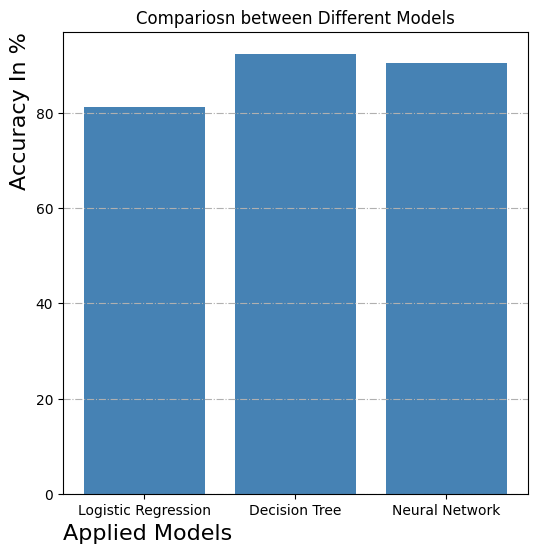

In [ ]:
models= [ 'Logistic Regression', 'Decision Tree','Neural Network']
values = [accuracy_log_reg,accuracy_rf,neural_testing_accuracy]

for i in range(len(models)):
    print(f"{models[i]}: {values[i]}%")



# Create bar chart
plt.figure(figsize=(6,6))
plt.bar(models, values, color='steelblue')
plt.xlabel('Applied Models',loc="left",fontsize="16")
plt.ylabel('Accuracy In %',loc="top",fontsize="16")
plt.title('Compariosn between Different Models')
plt.grid(axis='y', linestyle='dashdot')
plt.show()